In [11]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense # fully connected 
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

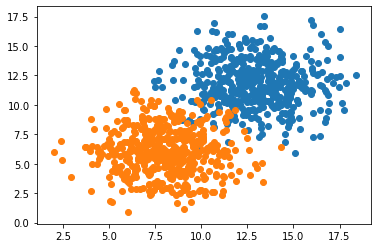

In [9]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])


In [54]:
model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam,loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x = X, y = y, verbose=1, batch_size=50, epochs = 500, shuffle='true')


Epoch 1/500
1000/1000 [==============================] - 0s 311us/step - loss: 1.7837 - accuracy: 0.4920
Epoch 2/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.6656 - accuracy: 0.5880
Epoch 3/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.5383 - accuracy: 0.7100
Epoch 4/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.4493 - accuracy: 0.8360
Epoch 5/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.3961 - accuracy: 0.8720
Epoch 6/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.3490 - accuracy: 0.9060
Epoch 7/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.3146 - accuracy: 0.9190
Epoch 8/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.2826 - accuracy: 0.9490
Epoch 9/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.2567 - accuracy: 0.9450
Epoch 10/500
1000/1000 [==============================] - 0s 45

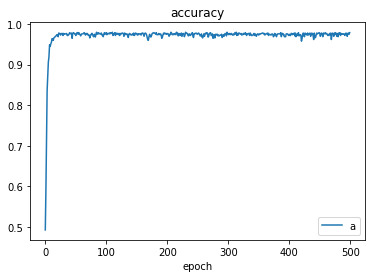

In [55]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend('accuracy')

In [60]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,0]) + 1)
    
#     print(y_span
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
#     print(xx)
#     print(yy)
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[0.9999933]]


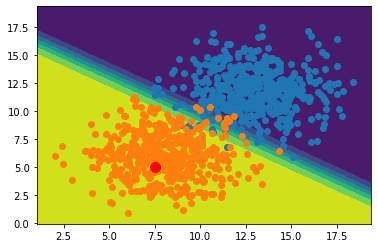

In [61]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x , y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)